#### Ques 1 : Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# loading the data
Laying_data = pd.read_csv('./Combined/Train/Laying/Subject_1.csv')
Sitting_data = pd.read_csv('./Combined/Train/Sitting/Subject_1.csv')
Standing_data = pd.read_csv('./Combined/Train/Standing/Subject_1.csv')
Walking_data = pd.read_csv('./Combined/Train/Walking/Subject_1.csv')
WalkingDownStairs_data = pd.read_csv('./Combined/Train/Walking_DownStairs/Subject_1.csv')
WalkingUpStairs_data = pd.read_csv('./Combined/Train/Walking_UpStairs/Subject_1.csv')


# creating dictionary to hold the data for each activity
activity_data = {
    'Laying' : Laying_data,
    'Sitting' : Sitting_data,
    'Standing' : Standing_data,
    'Walking' : Walking_data,
    'Walking DownStairs' : WalkingDownStairs_data,
    'Walking UpStairs' : WalkingUpStairs_data
}


print(Laying_data.head())


       accx      accy      accz
0  0.181141  0.787813  0.581194
1  0.180389  0.788230  0.584017
2  0.184572  0.788880  0.580620
3  0.187104  0.788494  0.574279
4  0.186461  0.786544  0.570184


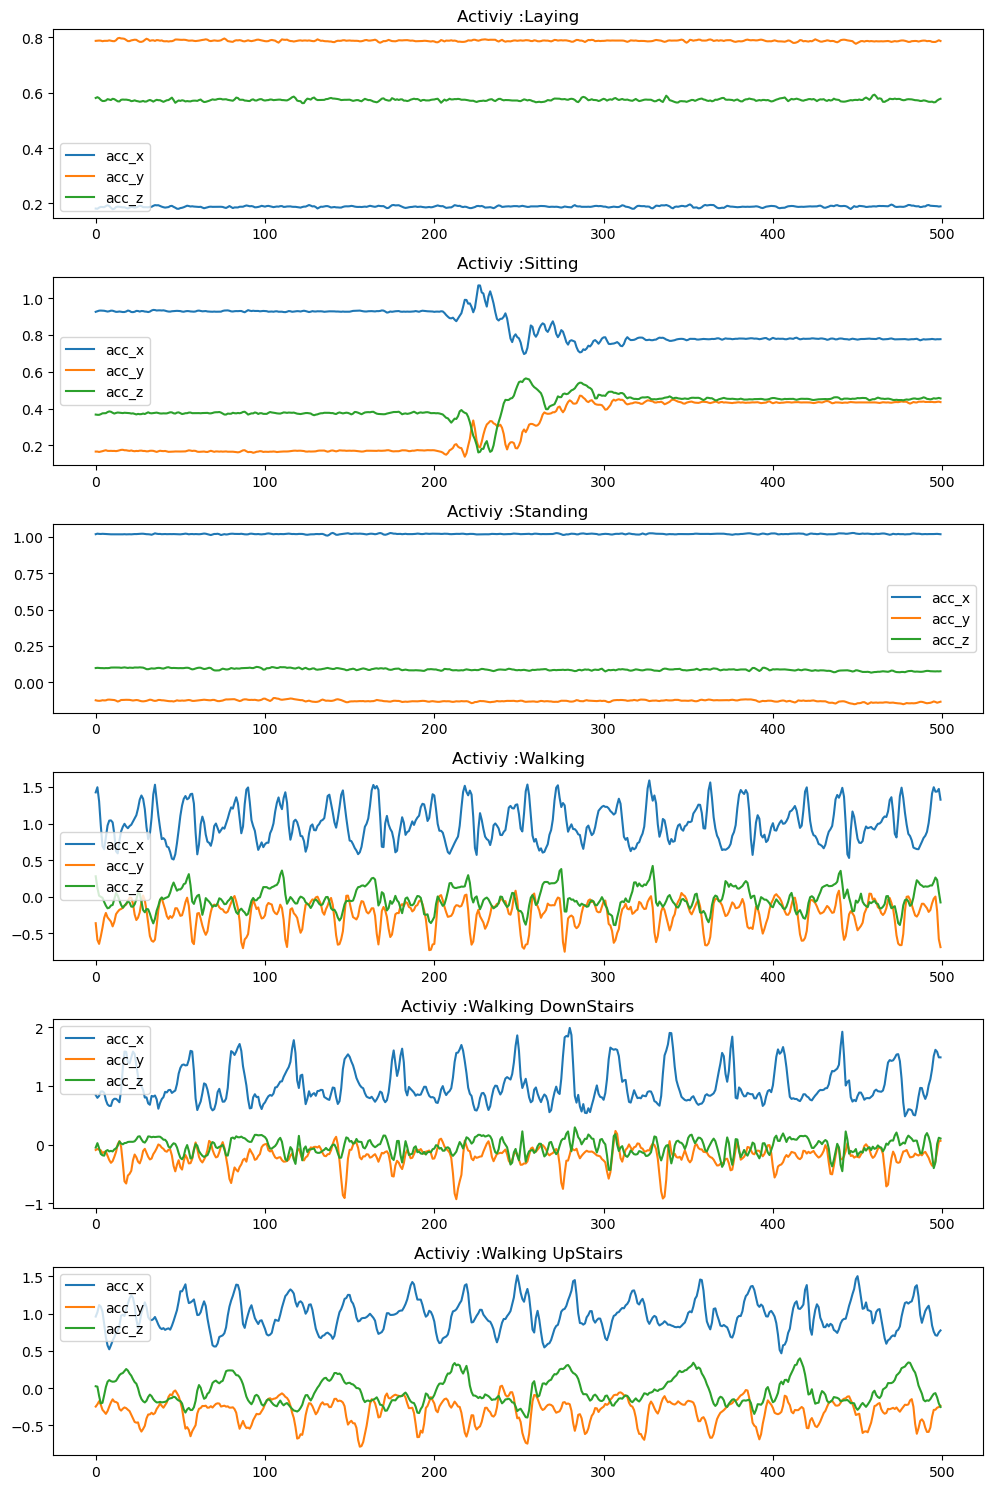

In [10]:
# ploting the wave form
fig, axes = plt.subplots(len(activity_data), 1, figsize = (10, 15))

for i, (activity, data) in enumerate(activity_data.items()):
    axes[i].plot(data['accx'][:500], label='acc_x')
    axes[i].plot(data['accy'][:500], label='acc_y')
    axes[i].plot(data['accz'][:500], label='acc_z')

    axes[i].set_title(f'Activiy :{activity}')
    axes[i].legend()

# adjust layout for better visibility
plt.tight_layout()
plt.show()

#### Static Activity : Sitting, Standing and Laying all have relatively flat waveform since there is minimal movement, so the acceration value over time remain constant over time 
#### Dynamic Activity : Walking, Walking upstair, Walking Downstair all have oscillating waveform because the object is in continous motion 

#### Yes, the model should be able to classify activities based on the data (Static Activity have majorly flat waveform whereas the Dynamic Activity have majorly oscillating waveform)

### 2) Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration (accx^2 + accy^2 + accz^2) for each activity and justify your answer.

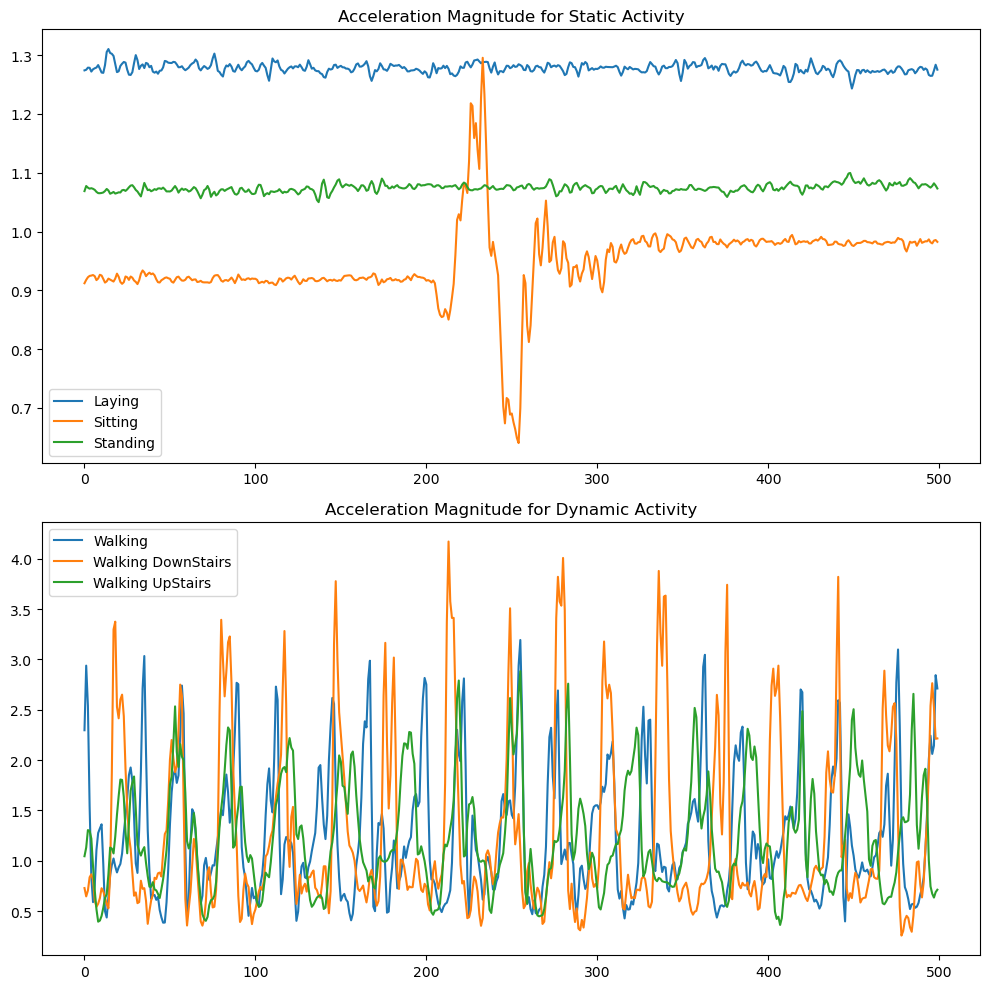

In [11]:
# Computing the acceraltion magnitude
def compute_acceleration(data):
    return (data['accx']**2 + data['accy']**2 + data['accy']**2)


# computing the acceleration magnitude
Laying_acc = compute_acceleration(Laying_data)
Sitting_acc = compute_acceleration(Sitting_data)
Standing_acc = compute_acceleration(Standing_data)
Walking_acc = compute_acceleration(Walking_data)
WalkingDownStairs_acc = compute_acceleration(WalkingDownStairs_data)
WalkingUpStairs_acc = compute_acceleration(WalkingUpStairs_data)


fig, axes = plt.subplots(2, 1 , figsize = (10, 10))
# static Activity 
axes[0].plot(Laying_acc[:500], label ='Laying') 
axes[0].plot(Sitting_acc[:500], label = 'Sitting')
axes[0].plot(Standing_acc[:500], label = 'Standing')
axes[0].set_title("Acceleration Magnitude for Static Activity")
axes[0].legend()


axes[1].plot(Walking_acc[:500], label='Walking')
axes[1].plot(WalkingDownStairs_acc[:500], label = 'Walking DownStairs')
axes[1].plot(WalkingUpStairs_acc[:500], label = 'Walking UpStairs')
axes[1].set_title("Acceleration Magnitude for Dynamic Activity")
axes[1].legend()

plt.tight_layout()
plt.show()

#### Q3)Visualize the data using PCA. [1 marks]Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.
#### Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
#### Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
#### Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

In [12]:
from sklearn.decomposition import PCA

# combine all_dataset and label
data_list = [Laying_data, Sitting_data, Standing_data, Walking_data, WalkingDownStairs_data, WalkingUpStairs_data]
labels = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking DownStairs', 'Walking UpStairs']

all_data = pd.concat(data_list)
all_label_list = []

for label, data in zip(labels, data_list):
    # calculating the number of data for a particular data
    label_repeated = [label]*len(data)
    for i in label_repeated : 
        all_label_list.append(label)

all_labels = np.array(all_label_list)


# computing the total acceleration 
total_acc = all_data['accx']**2 + all_data['accy']**2 + all_data['accz']**2


total_acc = total_acc.values.reshape(-1, 1)
pca = PCA(n_components=2)
total_acc_pca = pca.fit_transform(total_acc)


# plot the result 
plt.figure(figsize=(10, 12))

for label in np.unique(all_labels):
    mask = label==all_labels
    plt.scatter(total_acc_pca[mask, 0], total_acc_pca[mask, 1], label = label, alpha=0.7)

plt.title("PCA on total Acceleration")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'